# Python Image Processing & Computer Vision Tutorial

## Setup & Installation

Run this cell first to install dependencies:


In [62]:
# !pip install torch torchvision pillow matplotlib

## Import Libraries


In [63]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import torch
from PIL import Image

# Set consistent random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)

## Load Image

lenna: https://en.wikipedia.org/wiki/Lenna#/media/File:Lenna_(test_image).png


In [64]:
ROOT = Path().resolve()
print(f"Working directory: {ROOT}")

image_path = ROOT / "images" / "lenna.png"
if not image_path.exists():
    raise FileNotFoundError(f"Image not found at {image_path.absolute()}")
print(f"Image path: {image_path}")

pil_image = Image.open(image_path)
np_image = np.array(pil_image)

print(f"Image shape: {np_image.shape} (HxWxC)")
print(f"Data type: {np_image.dtype}")
print(f"Value range: {np_image.min()}-{np_image.max()}")

Working directory: C:\Users\arthu\OneDrive\Medientechnologie Arbeit\Deep Learning\Python Einführung
Image path: C:\Users\arthu\OneDrive\Medientechnologie Arbeit\Deep Learning\Python Einführung\images\lenna.png
Image shape: (256, 256, 4) (HxWxC)
Data type: uint8
Value range: 0-255


## Display Image


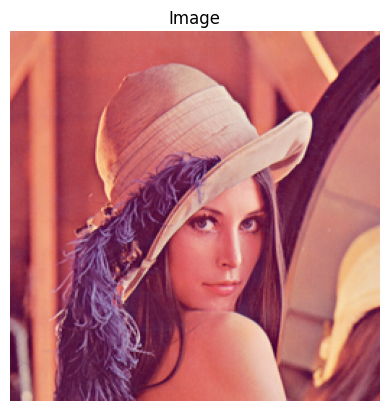

In [65]:
plt.figure()
plt.imshow(np_image)
plt.title("Image")
plt.axis("off")
plt.show()

## Convert Image to Grayscale


In [66]:
# Mean across RGB channels
gray_image = np_image.mean(axis=2).astype(np.uint8)
print(f"Gray image shape: {gray_image.shape} (HxW)")

Gray image shape: (256, 256) (HxW)


## Show Grayscale Images


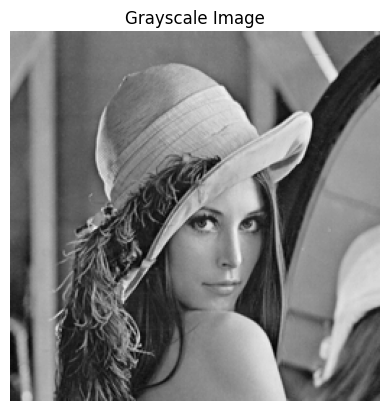

In [67]:
plt.figure()
plt.imshow(gray_image, cmap="gray")
plt.title("Grayscale Image")
plt.axis("off")
plt.show()

## Manipulate Pixels


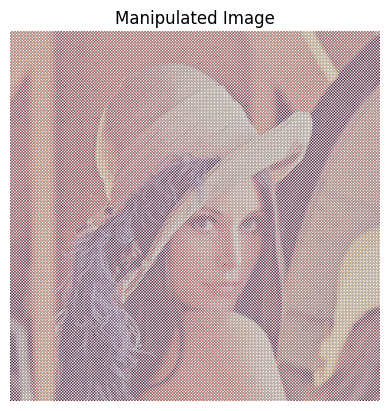

In [68]:
manipulated_image = np_image.copy()
# Set even rows, even columns to black
manipulated_image[::2, ::2] = 0
# Set odd rows, odd columns to white
manipulated_image[1::2, 1::2] = manipulated_image[::2, ::2]

plt.figure()
plt.imshow(manipulated_image)
plt.title("Manipulated Image")
plt.axis("off")
plt.show()

## PyTorch Image Loading & Preprocessing


### Define transformations


In [69]:
from torchvision import transforms

transform_pipeline = transforms.Compose(
    [
        # Resize to fixed size (height, width)
        transforms.Resize((128, 128)),
        # Image to grayscale (only one channel)
        transforms = transforms.RandomApply(torch.nn.ModuleList([
            transforms.ColorJitter(),
        ]), p=0.3)
        scripted_transforms = torch.jit.script(transforms)
        # Convert image to PyTorch tensor (C x H x W)
        transforms.ToTensor(),
    ]
)

SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (843080927.py, line 8)

### Apply transformations


In [ ]:
transformed_tensor: torch.Tensor = transform_pipeline(pil_image)

print("\nTransformed Tensor Info:")
print(f"Shape: {transformed_tensor.shape} (CxHxW)")
print(f"Data type: {transformed_tensor.dtype}")
print(
    f"Value range: {transformed_tensor.min().item():.2f}–{transformed_tensor.max().item():.2f}"
)


Transformed Tensor Info:
Shape: torch.Size([4, 128, 128]) (CxHxW)
Data type: torch.float32
Value range: 0.03–1.00


### Visualize Transformed Tensor


Display image shape: (128, 128, 4) (HxWxC)
Display image data type: float32
Display image value range: 0.03-1.00


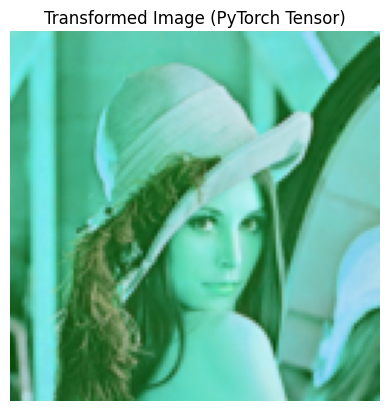

In [70]:
# Convert tensor back to numpy for visualization
# Change from CxHxW to HxWxC
display_image = transformed_tensor.permute(1, 2, 0).numpy()
print(f"Display image shape: {display_image.shape} (HxWxC)")
print(f"Display image data type: {display_image.dtype}")
print(f"Display image value range: {display_image.min():.2f}-{display_image.max():.2f}")

plt.figure()
plt.imshow(display_image, cmap="gray")
plt.title("Transformed Image (PyTorch Tensor)")
plt.axis("off")
plt.show()

### Use ImageFolder to load data

cat:
https://commons.wikimedia.org/wiki/File:Tabby_cat_with_blue_eyes-3336579.jpg

dog:
https://commons.wikimedia.org/wiki/File:Labrador_czekoladowy.jpg


In [16]:
from torchvision import datasets

# Initialize dataset
dataset = datasets.ImageFolder(
    root=ROOT / "images",
    transform=transform_pipeline,
)

# Metadata
print(f"Class names: {dataset.classes}")
print(f"Class-to-index mapping: {dataset.class_to_idx}")

Class names: ['cat', 'dog']
Class-to-index mapping: {'cat': 0, 'dog': 1}


In [17]:
# Get first image and label
image: torch.Tensor
label: int
image, label = dataset[0]
# Print shape (CxHxW)
print(f"Image shape: {image.shape}")
# Print label (0: cats, 1: dogs)
print(f"Label: {label}")
# Print device (CPU or GPU)
print(f"Device: {image.device}")

Image shape: torch.Size([1, 128, 128])
Label: 0
Device: cpu


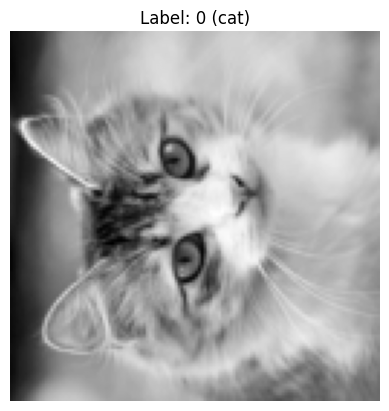

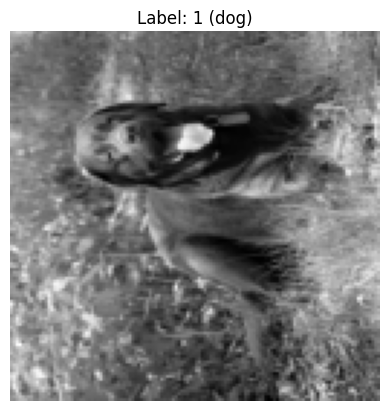

In [25]:
for i in range(len(dataset)):
    image: torch.Tensor
    label: int
    image, label = dataset[i]

    plt.figure()
    plt.imshow(image.permute(2, 1, 0).numpy(), cmap="gray")
    plt.title(f"Label: {label} ({dataset.classes[label]})")
    plt.axis("off")
    plt.show()

### Get Device / Use GPU


In [19]:
def get_device() -> torch.device:
    if torch.cuda.is_available():
        device = torch.device("cuda")
    elif torch.backends.mps.is_available():
        device = torch.device("mps")
    else:
        device = torch.device("cpu")
    x = torch.ones(1, device=device)

    return device

In [20]:
device = get_device()
print(f"Device: {device}")

Device: cpu


In [21]:
for i in range(len(dataset)):
    image: torch.Tensor
    label: int
    image, label = dataset[i]

    image = image.to(device)
    print(f"Image tensor device: {image.device}")

Image tensor device: cpu
Image tensor device: cpu
